# Classificação com Árvores de Decisão e Random Forest usando Pipeline

In [1]:
# Importação de bibliotecas
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler


path = "/content/drive/MyDrive/ml-project/data" #pasta do projeto
FILE = "smart-contract-dataset.csv" #nome do arquivo
SEED = 78 #seed para usar nas divisões de dados
CV_FOLDS = 5 #folds para cross validation
SCORING_METRIC = 'precision' #qual estimativa priorizar


## Carregamento dos dados

Estou filtrando apenas as 15 feactures mais importantes segundo índice Gini

In [2]:
data = pd.read_csv(os.path.join(FILE))  # Carrega os dados
numeric_data = data.iloc[:, 3:].select_dtypes(include="number")

# Lista de colunas desejadas
selected_columns = [
    'emit',
    'ast_id',
    'Weight bytecode_character_5',
    'internal',
    'require',
    'from',
    'will',
    'string',
    'bytecode_entropy',
    'external',
    'length',
    'Opcode weight LT',
    'ast_len_nodes',
    'mapping',
    'can'
]


# Filtra apenas as colunas desejadas
X = numeric_data[selected_columns]

# Variável alvo
y = data['label']

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED
)

## Pipeline com Random Forest priorizando o Recall

Melhores parâmetros para Random Forest: {'clf__max_depth': 20, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5, 'clf__n_estimators': 100}
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      5410
           1       0.51      0.76      0.62      1925

    accuracy                           0.75      7335
   macro avg       0.71      0.75      0.71      7335
weighted avg       0.80      0.75      0.76      7335



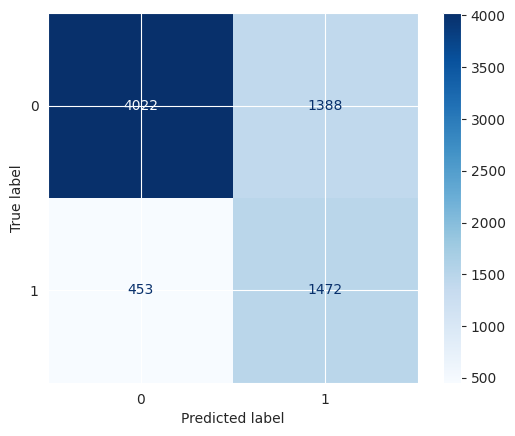

In [4]:
# Pipeline com Random Forest
rf_pipeline = Pipeline([
    ('undersampler', RandomUnderSampler(sampling_strategy='auto', random_state=SEED)),
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42))
])

# Grade de parâmetros para Random Forest
rf_param_grid = {
    'clf__n_estimators': [50, 100],
    'clf__max_depth': [None, 5, 10, 15, 20],
    'clf__min_samples_split': [2, 5],
    'clf__min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(rf_pipeline, rf_param_grid, scoring='recall', cv=5, n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Avaliação
print("Melhores parâmetros para Random Forest:", rf_grid.best_params_)
y_pred_rf = rf_grid.predict(X_test)
print(classification_report(y_test, y_pred_rf))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, cmap="Blues")
plt.show()
